In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Recebe o arquivo Excel
nome_arquivo = 'GP_example_ilum.xlsx'

# Carrega o arquivo Excel em um DataFrame, garantindo que o cabeçalho é a primeira linha
df = pd.read_excel(nome_arquivo, header=None)

# Exibe as primeiras linhas do DataFrame
print(df.head())


      0      1      2      3      4      5      6      7      8      9   ...  \
0    0.0  0.318  0.212  0.244  0.198  0.203  0.224  0.192  0.166  0.137  ...   
1   30.0  0.376  0.249  0.297  0.243  0.243  0.271  0.240  0.201  0.172  ...   
2   60.0  0.407  0.269  0.327  0.263  0.265  0.287  0.257  0.219  0.184  ...   
3   90.0  0.443  0.292  0.355  0.281  0.284  0.309  0.274  0.227  0.194  ...   
4  120.0  0.484  0.315  0.384  0.312  0.314  0.333  0.295  0.247  0.213  ...   

      87     88     89     90     91     92     93     94     95     96  
0  0.228  0.189  0.217  0.178  0.138  0.116  0.082  0.051  0.051  0.079  
1  0.273  0.228  0.257  0.205  0.150  0.124  0.083  0.047  0.047  0.073  
2  0.295  0.247  0.275  0.228  0.160  0.131  0.089  0.046  0.048  0.071  
3  0.320  0.270  0.302  0.247  0.167  0.137  0.094  0.047  0.047  0.075  
4  0.340  0.298  0.322  0.264  0.171  0.138  0.096  0.047  0.048  0.075  

[5 rows x 97 columns]


In [3]:
import pandas as pd
tempo_horas = (df.iloc[:, 0].values)/60

# Criar uma lista para armazenar as médias
mean_triplets = []

# Remover a primeira coluna (Time) do DataFrame original
df_without_first = df.iloc[:, 1:]

# Iterar sobre as colunas a cada três
for i in range(0, df_without_first.shape[1], 3):
    # Selecionar três colunas por vez
    triplet = df_without_first.iloc[:, i:i+3]
    
    # Calcular a média das três colunas linha por linha
    triplet_mean = triplet.mean(axis=1)
    
    # Adicionar a nova série de médias à lista
    mean_triplets.append(triplet_mean)

# Converter a lista de médias em um DataFrame e transpor
df_means = pd.DataFrame(mean_triplets).T

# Inserir a coluna 'Time' novamente no novo DataFrame
df_means.insert(0, "Time", tempo_horas)

# Exibir o novo DataFrame com as médias calculadas
print(df_means)


           Time         0         1         2         3         4         5  \
0      0.000000  0.258000  0.208333  0.165000  0.185667  0.207333  0.189000   
1      0.500000  0.307333  0.252333  0.204333  0.229000  0.260667  0.232667   
2      1.000000  0.334333  0.271667  0.220000  0.251667  0.281000  0.248000   
3      1.500000  0.363333  0.291333  0.231667  0.265667  0.304333  0.269333   
4      2.000000  0.394333  0.319667  0.251667  0.284000  0.331667  0.295333   
..          ...       ...       ...       ...       ...       ...       ...   
235  117.504167  8.317333  7.636333  7.483333  8.803333  8.433667  7.857667   
236  118.004167  8.328000  7.644333  7.487667  8.809333  8.435333  7.827333   
237  118.504167  8.330333  7.689333  7.518000  8.837667  8.448000  7.844000   
238  119.004167  8.363333  7.711000  7.513000  8.828000  8.485333  7.900000   
239  119.504167  8.328000  7.682667  7.523333  8.827333  8.427000  7.845333   

            6         7         8  ...        22   

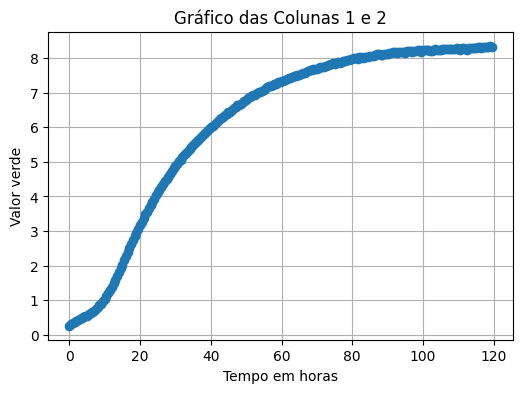

In [11]:
# Plota os dados
plt.figure(figsize=(6, 4))
plt.plot(tempo_horas, df_means.iloc[:, 1], marker='o', linestyle='-')
plt.xlabel('Tempo em horas')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2')
plt.grid(True)
plt.show()

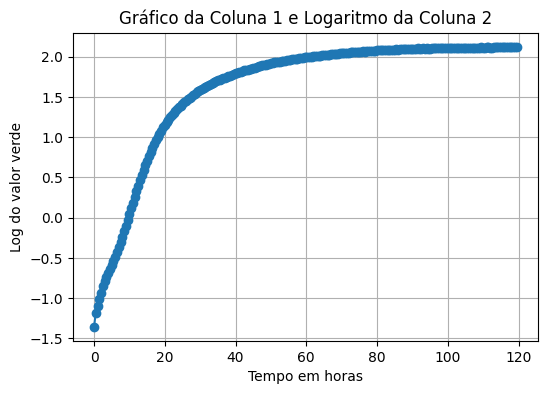

In [5]:
# Aplicar o logaritmo natural na segunda coluna do DataFrame (df_means.iloc[:, 1])
log_column = np.log(df_means.iloc[:, 1])

# Plotar o gráfico com a coluna logaritmada
plt.figure(figsize=(6, 4))
plt.plot(tempo_horas, log_column, marker='o', linestyle='-')
plt.xlabel('Tempo em horas')  # Renomeie conforme necessário
plt.ylabel('Log do valor verde')  # Renomeie conforme necessário
plt.title('Gráfico da Coluna 1 e Logaritmo da Coluna 2')
plt.grid(True)
plt.show()


Coeficiente Angular (slope): 0.01791194073682411
Coeficiente Linear (intercept): 0.5465384871364336
R²: 0.5937981313563759


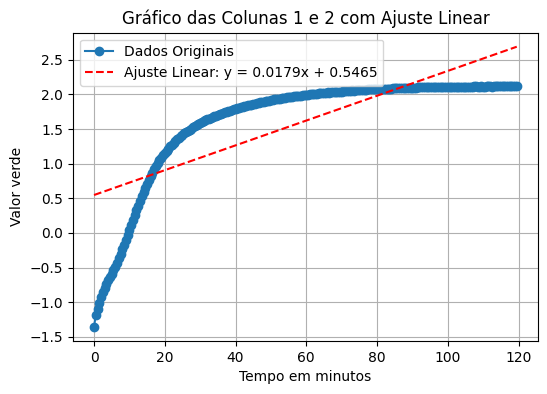

In [6]:
from scipy.stats import linregress

# Supondo que você já tenha carregado os dados no DataFrame 'df'
x = tempo_horas  # Tempo em horas (ou a coluna correspondente)
y = log_column  # Valor verde (ou a coluna correspondente)

# Ajuste de curva linear

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Exibe os coeficientes
print(f"Coeficiente Angular (slope): {slope}")
print(f"Coeficiente Linear (intercept): {intercept}")
print(f"R²: {r_value**2}")

# Plota os dados e a linha de ajuste
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', linestyle='-', label='Dados Originais')
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label=f'Ajuste Linear: y = {slope:.4f}x + {intercept:.4f}')
plt.xlabel('Tempo em minutos')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Linear')
plt.grid(True)
plt.legend()
plt.show()



Coeficiente Angular (slope): 0.12697577224094694
Coeficiente Linear (intercept): -1.214416690386699
R²: 0.997614000345269


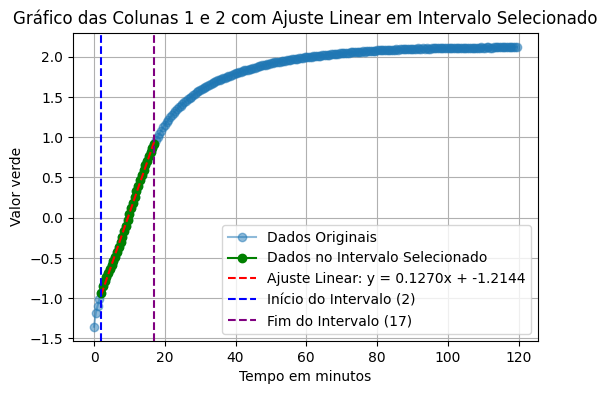

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Supondo que você já tenha carregado os dados no DataFrame 'df_means'
x = tempo_horas  # Tempo em minutos (ou a coluna correspondente)
y = log_column  # Valor verde (ou a coluna correspondente)

# Defina o intervalo desejado
intervalo_inicio = 2  # Alterar para o valor inicial do intervalo desejado
intervalo_fim = 17    # Alterar para o valor final do intervalo desejado

# Filtrar os dados com base no intervalo
mask = (x >= intervalo_inicio) & (x <= intervalo_fim)
x_filtrado = x[mask]
y_filtrado = y[mask]

# Ajuste de curva linear para o intervalo filtrado
slope, intercept, r_value, p_value, std_err = linregress(x_filtrado, y_filtrado)

# Exibe os coeficientes
print(f"Coeficiente Angular (slope): {slope}")
print(f"Coeficiente Linear (intercept): {intercept}")
print(f"R²: {r_value**2}")

# Plota os dados e a linha de ajuste
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', linestyle='-', label='Dados Originais', alpha=0.5)
plt.plot(x_filtrado, y_filtrado, marker='o', linestyle='-', label='Dados no Intervalo Selecionado', color='green')
plt.plot(x_filtrado, slope * x_filtrado + intercept, color='red', linestyle='--', label=f'Ajuste Linear: y = {slope:.4f}x + {intercept:.4f}')

# Adiciona barras verticais para o intervalo
plt.axvline(x=intervalo_inicio, color='blue', linestyle='--', label=f'Início do Intervalo ({intervalo_inicio})')
plt.axvline(x=intervalo_fim, color='purple', linestyle='--', label=f'Fim do Intervalo ({intervalo_fim})')

plt.xlabel('Tempo em minutos')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Linear em Intervalo Selecionado')
plt.grid(True)
plt.legend()

# Mostra o gráfico
plt.show()


Coeficiente Angular (slope): 0.12697577224094694
Coeficiente Linear (intercept): -1.214416690386699
R²: 0.997614000345269


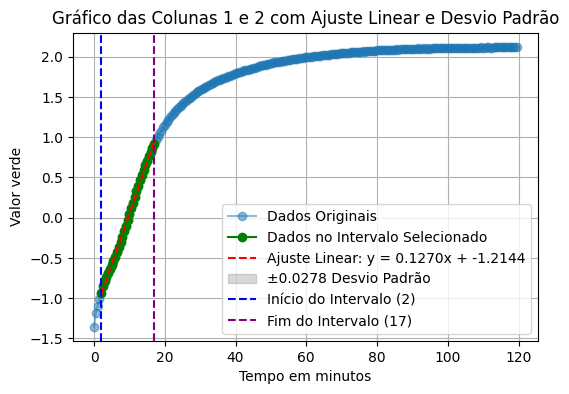

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Supondo que você já tenha carregado os dados no DataFrame 'df_means'
x = tempo_horas  # Tempo em minutos (ou a coluna correspondente)
y = log_column  # Valor verde (ou a coluna correspondente)

# Defina o intervalo desejado
intervalo_inicio = 2  # Alterar para o valor inicial do intervalo desejado
intervalo_fim = 17    # Alterar para o valor final do intervalo desejado

# Filtrar os dados com base no intervalo
mask = (x >= intervalo_inicio) & (x <= intervalo_fim)
x_filtrado = x[mask]
y_filtrado = y[mask]

# Ajuste de curva linear para o intervalo filtrado
slope, intercept, r_value, p_value, std_err = linregress(x_filtrado, y_filtrado)

# Exibe os coeficientes
print(f"Coeficiente Angular (slope): {slope}")
print(f"Coeficiente Linear (intercept): {intercept}")
print(f"R²: {r_value**2}")

# Calcula os valores ajustados
y_pred = slope * x_filtrado + intercept

# Calcula os resíduos (diferença entre os valores reais e os ajustados)
residuos = y_filtrado - y_pred

# Calcula o desvio padrão dos resíduos
std_residuos = np.std(residuos)

# Plota os dados e a linha de ajuste
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', linestyle='-', label='Dados Originais', alpha=0.5)
plt.plot(x_filtrado, y_filtrado, marker='o', linestyle='-', label='Dados no Intervalo Selecionado', color='green')
plt.plot(x_filtrado, y_pred, color='red', linestyle='--', label=f'Ajuste Linear: y = {slope:.4f}x + {intercept:.4f}')

# Plota a área sombreada representando o desvio padrão dos resíduos
plt.fill_between(x_filtrado, y_pred - std_residuos, y_pred + std_residuos, color='gray', alpha=0.3, label=f'±{std_residuos:.4f} Desvio Padrão')

# Adiciona barras verticais para o intervalo
plt.axvline(x=intervalo_inicio, color='blue', linestyle='--', label=f'Início do Intervalo ({intervalo_inicio})')
plt.axvline(x=intervalo_fim, color='purple', linestyle='--', label=f'Fim do Intervalo ({intervalo_fim})')

plt.xlabel('Tempo em minutos')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Linear e Desvio Padrão')
plt.grid(True)
plt.legend()

# Mostra o gráfico
plt.show()


Coeficiente Angular (slope): 0.12697577224094694
Coeficiente Linear (intercept): -1.214416690386699
R²: 0.997614000345269
Desvio Padrão Populacional (Dp): 0.02777088891247123


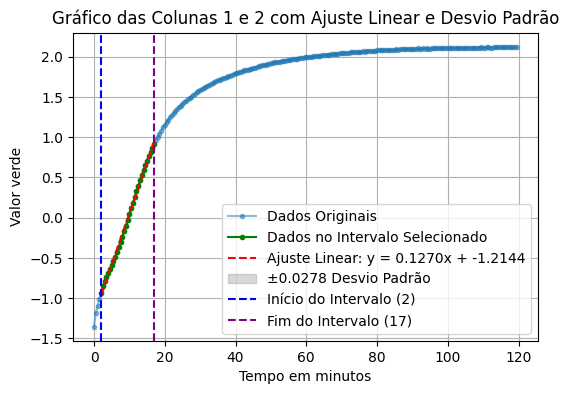

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Supondo que você já tenha carregado os dados no DataFrame 'df_means'
x = tempo_horas  # Tempo em minutos (ou a coluna correspondente)
y = log_column  # Valor verde (ou a coluna correspondente)

# Defina o intervalo desejado
intervalo_inicio = 2  # Alterar para o valor inicial do intervalo desejado
intervalo_fim = 17    # Alterar para o valor final do intervalo desejado

# Filtrar os dados com base no intervalo
mask = (x >= intervalo_inicio) & (x <= intervalo_fim)
x_filtrado = x[mask]
y_filtrado = y[mask]

# Ajuste de curva linear para o intervalo filtrado
slope, intercept, r_value, p_value, std_err = linregress(x_filtrado, y_filtrado)

# Exibe os coeficientes
print(f"Coeficiente Angular (slope): {slope}")
print(f"Coeficiente Linear (intercept): {intercept}")
print(f"R²: {r_value**2}")

# Calcula os valores ajustados
y_pred = slope * x_filtrado + intercept

# Calcula os resíduos (diferença entre os valores reais e os ajustados)
residuos = y_filtrado - y_pred

# Calcula a média dos resíduos
media_residuos = np.mean(residuos)

# Aplicando a fórmula do desvio padrão populacional
n = len(residuos)  # Número de dados
desvio_padrao_populacional = np.sqrt(np.sum((residuos - media_residuos) ** 2) / n)

# Exibe o desvio padrão calculado
print(f"Desvio Padrão Populacional (Dp): {desvio_padrao_populacional}")

# Plota os dados e a linha de ajuste
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='.', linestyle='-', label='Dados Originais', alpha=0.5)
plt.plot(x_filtrado, y_filtrado, marker='.', linestyle='-', label='Dados no Intervalo Selecionado', color='green')
plt.plot(x_filtrado, y_pred, color='red', linestyle='--', label=f'Ajuste Linear: y = {slope:.4f}x + {intercept:.4f}')

# Plota a área sombreada representando o desvio padrão dos resíduos
plt.fill_between(x_filtrado, y_pred - desvio_padrao_populacional, y_pred + desvio_padrao_populacional, 
                 color='gray', alpha=0.3, label=f'±{desvio_padrao_populacional:.4f} Desvio Padrão')

# Adiciona barras verticais para o intervalo
plt.axvline(x=intervalo_inicio, color='blue', linestyle='--', label=f'Início do Intervalo ({intervalo_inicio})')
plt.axvline(x=intervalo_fim, color='purple', linestyle='--', label=f'Fim do Intervalo ({intervalo_fim})')

plt.xlabel('Tempo em minutos')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Linear e Desvio Padrão')
plt.grid(True)
plt.legend()

# Mostra o gráfico
plt.show()


Fator de escala (a): 3.4283064179630576
Taxa de crescimento/decrescimento (b): 0.00908824389230799
R²: 0.6939988574445632


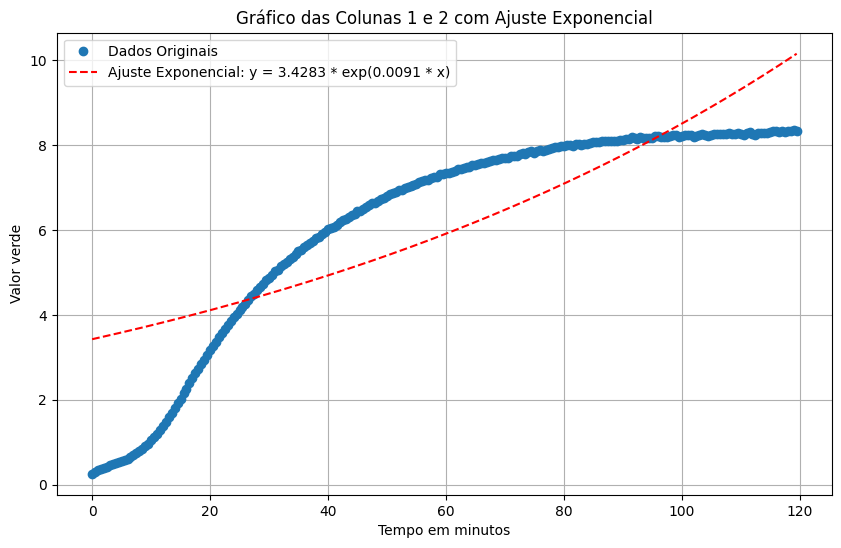

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supondo que você já tenha carregado os dados no DataFrame 'df'
x = tempo_horas  # Tempo em minutos (ou a coluna correspondente)
y = df_means.iloc[:, 1].values  # Valor verde (ou a coluna correspondente)


# Definir a função exponencial para o ajuste
def func_exponencial(x, a, b):
    return a * np.exp(b * x)

# Realizar o ajuste de curva usando curve_fit
params, covariance = curve_fit(func_exponencial, x, y, p0=[1, 0.001])

# Obter os parâmetros ajustados
a, b = params

# Exibir os parâmetros ajustados
print(f"Fator de escala (a): {a}")
print(f"Taxa de crescimento/decrescimento (b): {b}")

# Calcular o valor predito pela função ajustada para R²
y_pred = func_exponencial(x, a, b)

# Calcular R²
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared}")

# Plota os dados e a curva ajustada
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Dados Originais')
plt.plot(x, y_pred, color='red', linestyle='--', label=f'Ajuste Exponencial: y = {a:.4f} * exp({b:.4f} * x)')

plt.xlabel('Tempo em minutos')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Exponencial')
plt.grid(True)
plt.legend()
plt.show()


Fator de escala (a): 0.29595508047762825
Taxa de crescimento/decrescimento (b): 0.12742883565660607
R²: 0.9980364491640465


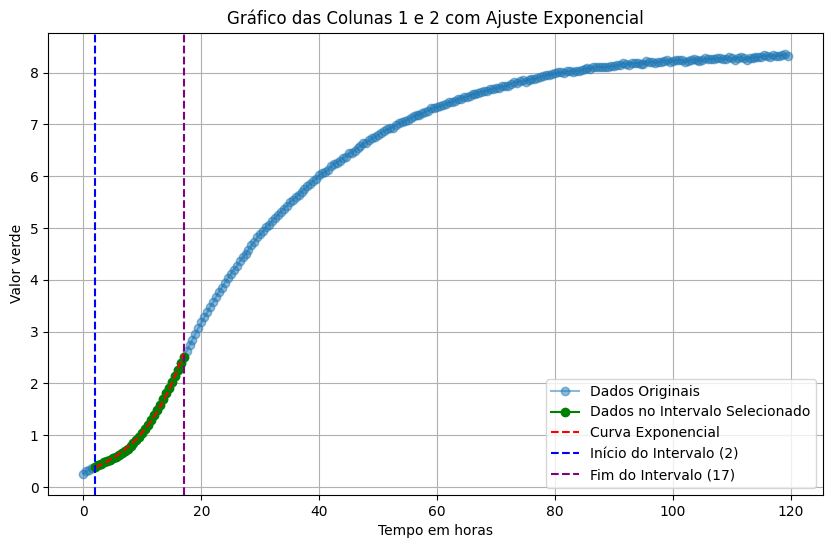

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supondo que você já tenha carregado os dados no DataFrame 'df_means'
x = tempo_horas  # Tempo em minutos (ou a coluna correspondente)
y = df_means.iloc[:, 1]  # Valor verde (ou a coluna correspondente)

# Defina o intervalo desejado
intervalo_inicio = 2  # Alterar para o valor inicial do intervalo desejado
intervalo_fim = 17    # Alterar para o valor final do intervalo desejado

# Filtrar os dados com base no intervalo
mask = (x >= intervalo_inicio) & (x <= intervalo_fim)
x_filtrado = x[mask]
y_filtrado = y[mask]

# Definir a função exponencial para o ajuste
def func_exponencial(x, a, b):
    return a * np.exp(b * x)

# Realizar o ajuste de curva exponencial usando curve_fit no intervalo filtrado
params, covariance = curve_fit(func_exponencial, x_filtrado, y_filtrado, p0=[1, 0.001])

# Obter os parâmetros ajustados
a, b = params

# Exibir os parâmetros ajustados
print(f"Fator de escala (a): {a}")
print(f"Taxa de crescimento/decrescimento (b): {b}")

# Calcular o valor predito pela função ajustada para R²
y_pred_filtrado = func_exponencial(x_filtrado, a, b)
ss_res = np.sum((y_filtrado - y_pred_filtrado) ** 2)
ss_tot = np.sum((y_filtrado - np.mean(y_filtrado)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared}")

# Plota os dados originais e a curva exponencial ajustada para o intervalo filtrado
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Dados Originais', alpha=0.5)
plt.plot(x_filtrado, y_filtrado, marker='o', linestyle='-', label='Dados no Intervalo Selecionado', color='green')
plt.plot(x_filtrado, y_pred_filtrado, color='red', linestyle='--', label='Curva Exponencial')

# Adiciona barras verticais para o intervalo
plt.axvline(x=intervalo_inicio, color='blue', linestyle='--', label=f'Início do Intervalo ({intervalo_inicio})')
plt.axvline(x=intervalo_fim, color='purple', linestyle='--', label=f'Fim do Intervalo ({intervalo_fim})')

plt.xlabel('Tempo em horas')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Exponencial')
plt.grid(True)
plt.legend()
plt.show()

Fator de escala (a): 0.29595508047762825
Taxa de crescimento/decrescimento (b): 0.12742883565660607
R²: 0.9980364491640465


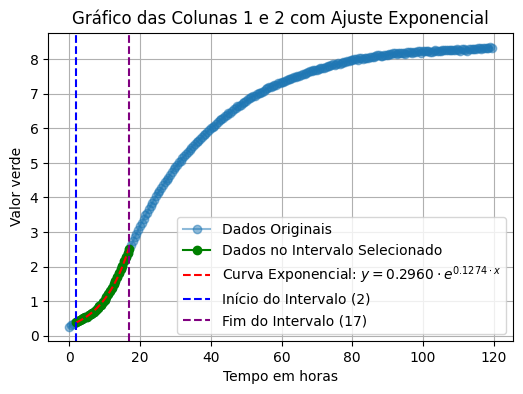

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supondo que você já tenha carregado os dados no DataFrame 'df_means'
x = tempo_horas  # Tempo em minutos (ou a coluna correspondente)
y = df_means.iloc[:, 1]  # Valor verde (ou a coluna correspondente)

# Defina o intervalo desejado
intervalo_inicio = 2  # Alterar para o valor inicial do intervalo desejado
intervalo_fim = 17    # Alterar para o valor final do intervalo desejado

# Filtrar os dados com base no intervalo
mask = (x >= intervalo_inicio) & (x <= intervalo_fim)
x_filtrado = x[mask]
y_filtrado = y[mask]

# Definir a função exponencial para o ajuste
def func_exponencial(x, a, b):
    return a * np.exp(b * x)

# Realizar o ajuste de curva exponencial usando curve_fit no intervalo filtrado
params, covariance = curve_fit(func_exponencial, x_filtrado, y_filtrado, p0=[1, 0.001])

# Obter os parâmetros ajustados
a, b = params

# Exibir os parâmetros ajustados
print(f"Fator de escala (a): {a}")
print(f"Taxa de crescimento/decrescimento (b): {b}")

# Calcular o valor predito pela função ajustada para R²
y_pred_filtrado = func_exponencial(x_filtrado, a, b)
ss_res = np.sum((y_filtrado - y_pred_filtrado) ** 2)
ss_tot = np.sum((y_filtrado - np.mean(y_filtrado)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared}")

# Plota os dados originais e a curva exponencial ajustada para o intervalo filtrado
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', linestyle='-', label='Dados Originais', alpha=0.5)
plt.plot(x_filtrado, y_filtrado, marker='o', linestyle='-', label='Dados no Intervalo Selecionado', color='green')
plt.plot(x_filtrado, y_pred_filtrado, color='red', linestyle='--', 
         label=f'Curva Exponencial: $y = {a:.4f} \cdot e^{{{b:.4f} \cdot x}}$')

# Adiciona barras verticais para o intervalo
plt.axvline(x=intervalo_inicio, color='blue', linestyle='--', label=f'Início do Intervalo ({intervalo_inicio})')
plt.axvline(x=intervalo_fim, color='purple', linestyle='--', label=f'Fim do Intervalo ({intervalo_fim})')

plt.xlabel('Tempo em horas')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Exponencial')
plt.grid(True)
plt.legend()
plt.show()


Fator de escala (a): 0.29595508047762825
Taxa de crescimento/decrescimento (b): 0.12742883565660607
R²: 0.9980364491640465
Desvio Padrão Populacional (Dp): 0.028536264268273333


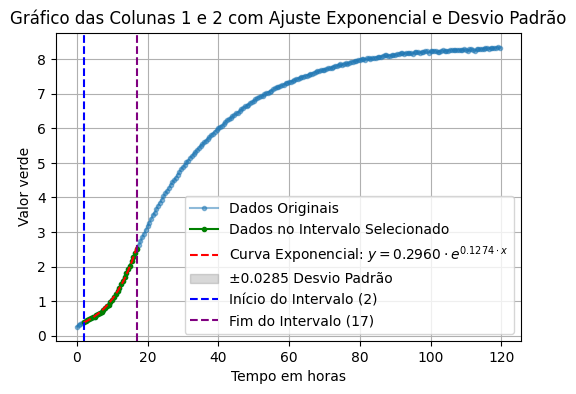

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Supondo que você já tenha carregado os dados no DataFrame 'df_means'
x = tempo_horas  # Tempo em minutos (ou a coluna correspondente)
y = df_means.iloc[:, 1]  # Valor verde (ou a coluna correspondente)

# Defina o intervalo desejado
intervalo_inicio = 2  # Alterar para o valor inicial do intervalo desejado
intervalo_fim = 17    # Alterar para o valor final do intervalo desejado

# Filtrar os dados com base no intervalo
mask = (x >= intervalo_inicio) & (x <= intervalo_fim)
x_filtrado = x[mask]
y_filtrado = y[mask]

# Definir a função exponencial para o ajuste
def func_exponencial(x, a, b):
    return a * np.exp(b * x)

# Realizar o ajuste de curva exponencial usando curve_fit no intervalo filtrado
params, covariance = curve_fit(func_exponencial, x_filtrado, y_filtrado, p0=[1, 0.001])

# Obter os parâmetros ajustados
a, b = params

# Exibir os parâmetros ajustados
print(f"Fator de escala (a): {a}")
print(f"Taxa de crescimento/decrescimento (b): {b}")

# Calcular o valor predito pela função ajustada para R²
y_pred_filtrado = func_exponencial(x_filtrado, a, b)
ss_res = np.sum((y_filtrado - y_pred_filtrado) ** 2)
ss_tot = np.sum((y_filtrado - np.mean(y_filtrado)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared}")

# Calcula os resíduos (diferença entre os valores reais e os ajustados)
residuos = y_filtrado - y_pred_filtrado

# Calcula a média dos resíduos
media_residuos = np.mean(residuos)

# Aplicando a fórmula do desvio padrão populacional de acordo com a equação fornecida
n = len(residuos)  # Número de dados
desvio_padrao_populacional = np.sqrt(np.sum((residuos - media_residuos) ** 2) / n)

# Exibe o desvio padrão calculado
print(f"Desvio Padrão Populacional (Dp): {desvio_padrao_populacional}")

# Plota os dados originais e a curva exponencial ajustada para o intervalo filtrado
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='.', linestyle='-', label='Dados Originais', alpha=0.5)
plt.plot(x_filtrado, y_filtrado, marker='.', linestyle='-', label='Dados no Intervalo Selecionado', color='green')
plt.plot(x_filtrado, y_pred_filtrado, color='red', linestyle='--', 
         label=f'Curva Exponencial: $y = {a:.4f} \cdot e^{{{b:.4f} \cdot x}}$')

# Plota a área sombreada representando o desvio padrão dos resíduos
plt.fill_between(x_filtrado, y_pred_filtrado - desvio_padrao_populacional, 
                 y_pred_filtrado + desvio_padrao_populacional, color='gray', alpha=0.3, 
                 label=f'±{desvio_padrao_populacional:.4f} Desvio Padrão')

# Adiciona barras verticais para o intervalo
plt.axvline(x=intervalo_inicio, color='blue', linestyle='--', label=f'Início do Intervalo ({intervalo_inicio})')
plt.axvline(x=intervalo_fim, color='purple', linestyle='--', label=f'Fim do Intervalo ({intervalo_fim})')

plt.xlabel('Tempo em horas')  # Renomeie conforme necessário
plt.ylabel('Valor verde')  # Renomeie conforme necessário
plt.title('Gráfico das Colunas 1 e 2 com Ajuste Exponencial e Desvio Padrão')
plt.grid(True)
plt.legend()

# Mostra o gráfico
plt.show()
